<a href="https://colab.research.google.com/github/DavidInojosa/Aliapp-2019.2/blob/master/AV2_Pratica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import preprocessing

#Carregue a base sample_stocks.csv ou outra base do seu interesse (do Kaggle, por exemplo)
data = pd.read_csv('sample_stocks.csv')

#Visualize suas informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   returns        648 non-null    int64  
 1   dividendyield  648 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


In [ ]:
data.head(50)

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0
5,-10,0.0
6,-20,0.0
7,-11,0.0
8,-12,0.0
9,-10,0.0


##**Plote a dispersão de returns vs. dividendyield**

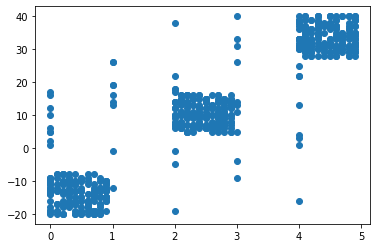

In [ ]:
x = data['dividendyield']
y = data['returns']

plt.scatter(x, y)
plt.show()

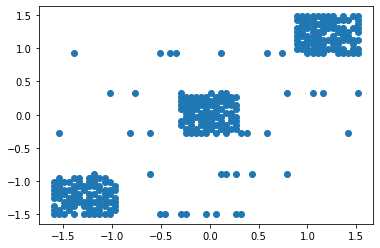

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize os dados
data.drop_duplicates(inplace=True)
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)

plt.scatter(X[:,0], X[:,1])

##**Crie e treine o KMeans com um valor de k que achar válido**
####**k == 5**

In [ ]:
#Crie e treine o KMeans com um valor de k que achar válido
from sklearn.cluster import KMeans

toElbow = []
#Depois de varios testes ficou decidido que o valor de k será 5 para melhor visualização
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    toElbow.append(kmeans.inertia_)

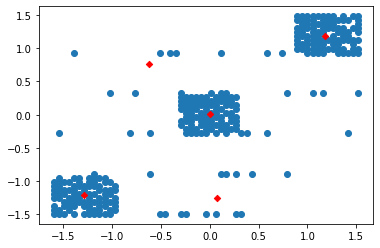

In [ ]:
#Plote a dispersão juntamente com os kmeans.cluster_centers_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], marker='D', c='r', s=20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

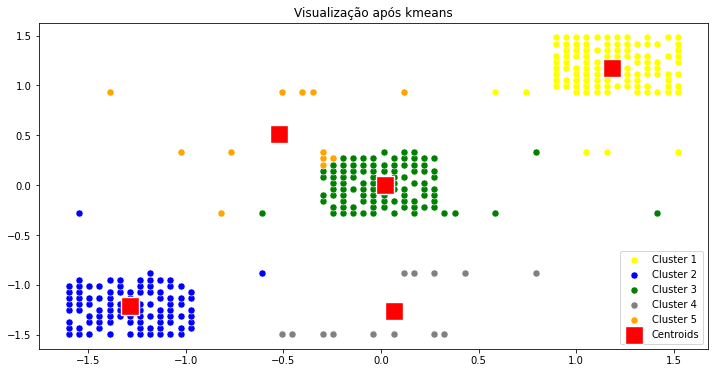

In [ ]:
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.figure(figsize=(12,6))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Visualização após kmeans')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


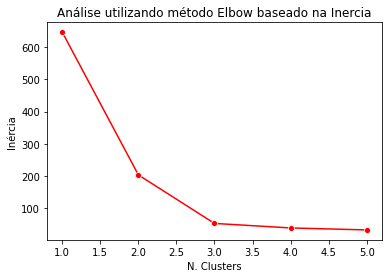

In [ ]:
#Analise o valor de K utilizando o método Elbow baseado na inércia

sns.lineplot(range(1, 6), toElbow,marker='o',color='red')
plt.title('Análise utilizando método Elbow baseado na Inercia')
plt.xlabel('N. Clusters')
plt.ylabel('Inércia')
plt.show()


###**Apos a analise vimos que o k mais eficiente sera:**
####**K == 3**

In [ ]:
toElbow = []

for i in range(1, 4):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    toElbow.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

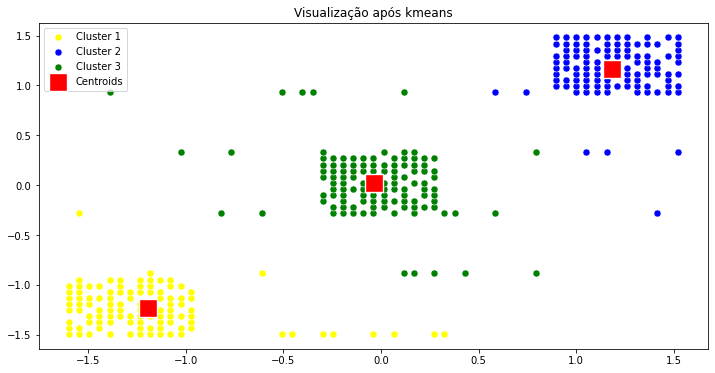

In [ ]:
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.figure(figsize=(12,6))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Visualização após kmeans')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


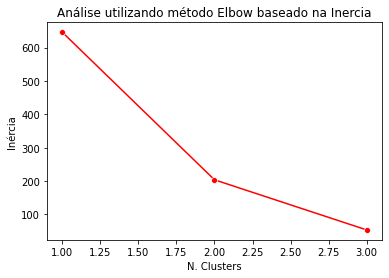

In [ ]:
#Analise o valor de K utilizando o método Elbow baseado na inércia

sns.lineplot(range(1, 4), toElbow,marker='o',color='red')
plt.title('Análise utilizando método Elbow baseado na Inercia')
plt.xlabel('N. Clusters')
plt.ylabel('Inércia')
plt.show()


##**Parte 2**

In [ ]:
#Implemente Clustering Hierárquico
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete').fit(X)
print('Lista de filhos de cada nó', model.children_)


Lista de filhos de cada nó [[284 290]
 [  0   5]
 [  1   2]
 [ 11  12]
 [  6   7]
 [ 19  26]
 [ 24  25]
 [  3   4]
 [ 27  28]
 [ 10  16]
 [ 20  22]
 [ 29  34]
 [ 33  37]
 [ 38  40]
 [ 30  35]
 [ 42  44]
 [ 49  51]
 [ 59  60]
 [ 43  46]
 [ 50  52]
 [ 57  65]
 [ 48  54]
 [ 47  55]
 [ 56  62]
 [ 66  73]
 [ 85  87]
 [ 70  71]
 [ 77  82]
 [ 75  81]
 [ 67  69]
 [ 89  90]
 [ 68  72]
 [ 79  80]
 [ 76  83]
 [ 84  86]
 [104 106]
 [ 96  97]
 [ 93  95]
 [ 98 101]
 [118 119]
 [128 131]
 [125 129]
 [135 138]
 [145 149]
 [151 153]
 [170 172]
 [163 165]
 [176 183]
 [157 160]
 [303 304]
 [136 139]
 [158 161]
 [162 171]
 [174 175]
 [179 181]
 [184 192]
 [185 188]
 [186 189]
 [187 190]
 [197 199]
 [194 196]
 [193 204]
 [205 210]
 [219 224]
 [206 207]
 [214 220]
 [200 203]
 [209 212]
 [216 222]
 [215 223]
 [226 230]
 [235 240]
 [236 239]
 [246 247]
 [232 233]
 [238 242]
 [245 252]
 [195 202]
 [227 229]
 [217 221]
 [243 248]
 [244 250]
 [251 253]
 [255 258]
 [265 266]
 [256 259]
 [262 272]
 [254 257]
 [268

##**Visualize o dendograma**

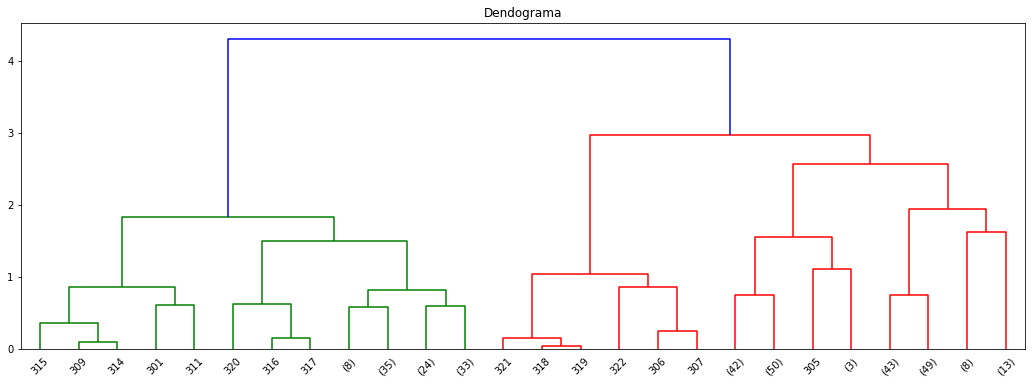

In [ ]:


def plot_dendrogram(model, **kwargs):

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(18,6))
plt.title('Dendograma')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.show()